# Solución numérica de un circuito L-RC

---
---
## Descripción del problema

---

## Preliminares

In [ ]:
import numpy as np   # Herramientas matemáticas de propósito general
import scipy as sp   # Para el integrador numérico de ODEs
from matplotlib import pyplot as plt   # Para dibujar

---
## Representación del sistema como un espacio de estados

El circuito L-RC puede ser representado como sigue

$$\underbrace{\left( \begin{array}{c} \dot v_c \\ \dot i_l \end{array} \right)}_{\mathbf{\dot X}} = \underbrace{\left( \begin{array}{cc} -\frac{1}{RC}  & \frac{1}{C} \\ -\frac{1}{L} & 0\end{array} \right)}_{\mathbf{A}}  \underbrace{\left( \begin{array}{c} v_c \\ i_l \end{array} \right)}_{\mathbf{X}}  +  \underbrace{\left(  \begin{array}{c} 0 \\ \frac{1}{L}  \end{array} \right)}_{\mathbf{B}} \underbrace{v_{in}}_{\mathbf{U}} $$

En nuestro caso, escogemos como la salida las variables de estado, así:

$$\underbrace{ \left( \begin{array}{c} v_c \\ i_l \end{array} \right) }_{\mathbf{Y}} = \underbrace{\left( \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right)}_{\mathbf{C}} \underbrace{ \left( \begin{array}{c} v_c \\ i_l \end{array} \right) }_{\mathbf{X}} + \underbrace{\left( \begin{array}{c} 0 \\ 0 \end{array} \right)}_{\mathbf{D}} \underbrace{v_{in}}_{\mathbf{U}}$$

In [ ]:
def LCRdif(X, t, L, C, R, u):
    # dX/dt = AX + BU
    dX = [-1/(R*C)*X[0] + 1/C*X[1], \
          -1/L*X[0] + 1/L*u ]
    return dX

---
## Uso de técnicas de integración numérica

In [ ]:
X0 = [1,  0.01]  # Condición inicial: [vC0, iL0]
t = np.linspace(0, 1, 1000)   # Vector de tiempos. Debe ser pensado teniendo en
                              # cuenta las dinámicas del sistema.

# Cálculo de la solución no forzada del sistema (vin=0)
X = sp.integrate.odeint(LCRdif, X0, t, args = (0.2, 0.001, 100, 0))

# Cálculo de la solución forzada para vin=2 V
X_disp = sp.integrate.odeint(LCRdif, X0, t, args = (0.2, 0.001, 100, 2))

---
## Graficación de las variables de estado en el tiempo

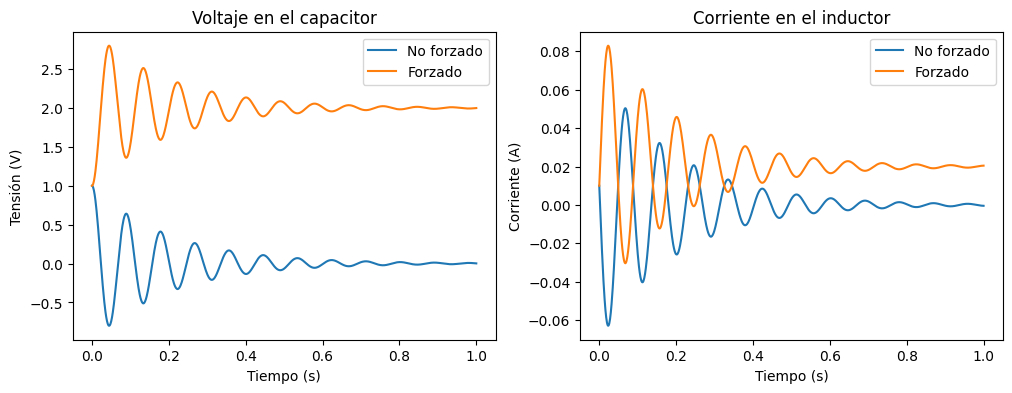

In [ ]:
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
ax[0].plot(t, X[:,0], label='No forzado'), ax[0].plot(t, X_disp[:,0], label='Forzado')
ax[0].set_title('Voltaje en el capacitor'), ax[0].legend()
ax[1].plot(t, X[:,1], label='No forzado'), ax[1].plot(t, X_disp[:,1], label='Forzado')
ax[1].set_title('Corriente en el inductor')
ax[1].legend()
ax[0].set_xlabel('Tiempo (s)'), ax[1].set_xlabel('Tiempo (s)')
ax[0].set_ylabel('Tensión (V)'), ax[1].set_ylabel('Corriente (A)')
plt.show()

---
## Construcción del diagrama de fase

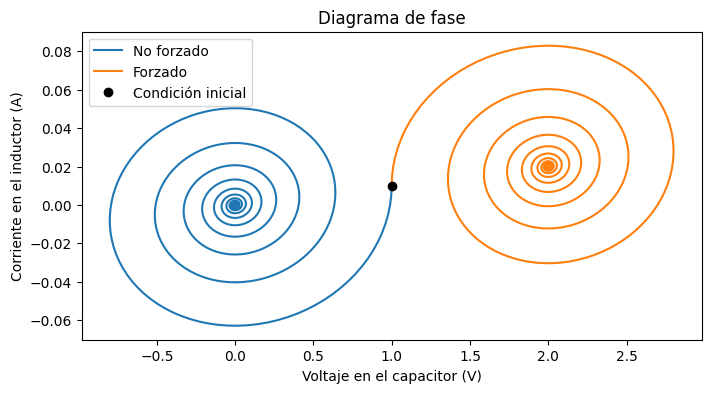

In [ ]:
plt.figure(figsize = (8,4))
plt.plot(X[:,0], X[:,1], label='No forzado')
plt.plot(X_disp[:,0], X_disp[:,1], label='Forzado')
plt.plot(X0[0], X0[1], 'ko', label='Condición inicial')
plt.xlabel('Voltaje en el capacitor (V)')
plt.ylabel('Corriente en el inductor (A)')
plt.title('Diagrama de fase')
plt.legend()
plt.show()